In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/tbsexton/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


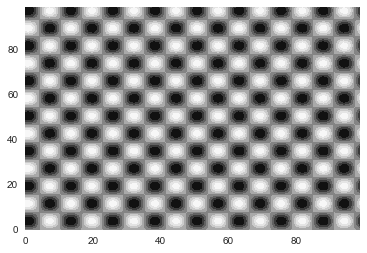

In [2]:
x = np.linspace(0,1, 100)
y = x

xx, yy = np.meshgrid(x,y)
# zz = 2*xx+3*yy - 1
zz = np.cos(50*xx)*np.sin(40*yy)
plt.contourf(xx, yy, zz)
plt.contourf(np.roll(zz, 1, axis=1))


In [3]:
def finite_grad(a, stencil=[-1,1], weights =[.5,.5]):
    n = range(a.ndim)
    
    sten_0 = [[weights[k]*np.roll(a, shift=i, axis=n[d])for k,i in enumerate(stencil)]for d in n ]
    print sten_0
finite_grad(zz)
    


[[array([[ 0.19656831,  0.17202676,  0.10453015, ...,  0.05719027,
         0.14104553,  0.18968174],
       [ 0.36148128,  0.31635036,  0.19222677, ...,  0.10517063,
         0.25937712,  0.34881716],
       [ 0.46818136,  0.40972894,  0.24896723, ...,  0.13621433,
         0.33593865,  0.45177911],
       ..., 
       [ 0.47365724,  0.41452115,  0.25187916, ...,  0.1378075 ,
         0.3398678 ,  0.45706314],
       [ 0.37255658,  0.32604291,  0.19811634, ...,  0.10839292,
         0.26732408,  0.35950444],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), array([[ 0.37255658,  0.32604291,  0.19811634, ...,  0.10839292,
         0.26732408,  0.35950444],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19656831,  0.17202676,  0.10453015, ...,  0.05719027,
         0.14104553,  0.18968174],
       ..., 
       [ 0.44302799,  0.38771596,  0.23559129, ...,  0.12889612,
     

[[ 11155.98602152   9763.16159726   5932.47647569 ...,   3245.76170528
    8004.86123096  10765.1475251 ]
 [ -1236.56169419  -1385.04269032   -841.60577455 ...,   -460.45724837
   -1135.60289098  -1417.14529077]
 [ -2273.98767308  -2547.03830732  -1547.67947763 ...,   -846.76252845
   -2088.32845764  -2606.07371011]
 ..., 
 [ -3135.81336392  -3512.34831088  -2134.23935691 ...,  -1167.6797039
   -2879.79058252  -3593.75772537]
 [ -2979.65835174  -3337.44287819  -2027.96001752 ...,  -1109.53241731
   -2736.38481142  -3414.79832433]
 [ -6488.68805386  -6252.59794823  -3799.32154869 ...,  -2078.67531196
   -5126.53390093  -6685.73195069]]


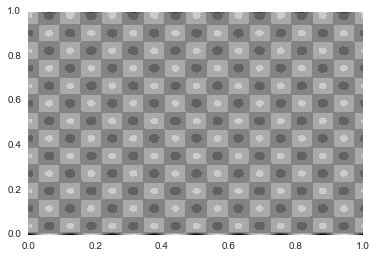

In [4]:
def O2_lap(a, N):
    div = (N-1)**2
    f_xp1 = np.roll(a, shift=1, axis=0)
    f_xm1 = np.roll(a, shift=-1, axis=0)
    f_yp1 = np.roll(a, shift=-1, axis=1)
    f_ym1 = np.roll(a, shift=1, axis=1)
#     print (f_yp1-2.*a+f_ym1)*div
    df = np.add((f_xp1-2.*a+f_xm1)*div, (f_yp1-2.*a+f_ym1)*div)
    return df

print O2_lap(zz, 100.)
plt.contourf(xx, yy, O2_lap(zz, 100.))

array([[ 0.50876995,  0.50931201,  0.50973768, ...,  0.50666548,
         0.50742298,  0.50813255],
       [ 0.50929864,  0.50981774,  0.51021222, ...,  0.50720979,
         0.50797114,  0.50867548],
       [ 0.50981412,  0.51030658,  0.51066681, ...,  0.50775409,
         0.50851466,  0.50920932],
       ..., 
       [ 0.50707977,  0.50766754,  0.50816709, ...,  0.50501019,
         0.50572779,  0.50642548],
       [ 0.50766426,  0.50824068,  0.50871891, ...,  0.50556936,
         0.50630502,  0.50701128],
       [ 0.50822623,  0.50878742,  0.50924103, ...,  0.50611969,
         0.50686865,  0.50757888]])

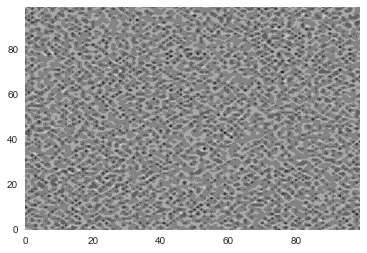

In [26]:
# from scipy.stats import threshold
dt = 1e-5
t = 0.
N=100
phi = np.random.rand(N,N)
plt.contourf(np.round(phi))
plt.contourf(O2_lap(phi, N))
times = []
dat = []
while t<=.005:
#     print 'hi'
    phi = phi +( O2_lap(phi, N) + phi - np.power(phi, 3))*dt
    times+=[t]
    t+=dt
    dat+=[phi]
phi

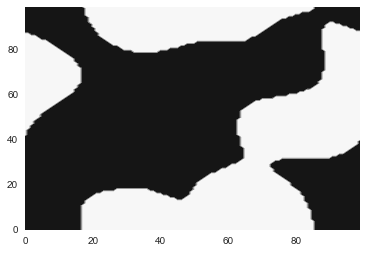

In [27]:
plt.contourf(np.round(phi))
# plt.contourf(phi + O2_lap(phi, N) + phi - np.power(phi, 3))

In [85]:
%timeit O2_lap(phi, N)

10000 loops, best of 3: 94.1 µs per loop


In [86]:
dt*100**2

0.2

In [7]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage


[MoviePy] Building file svm.gif with imageio


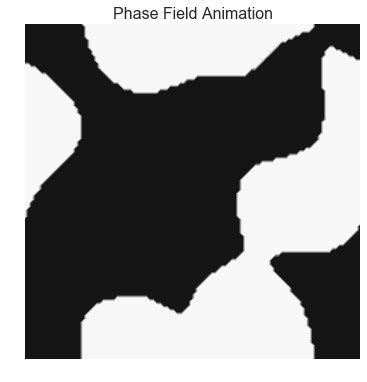

In [42]:
fig, ax = plt.subplots(1, figsize=(6, 6))
def plot_until_t(time):
    ax.clear()
    ax.axis('off')
    ax.set_title("Phase Field Animation", fontsize=16)
#     print np.argmin(np.abs(np.array(times)-.0005*(time))
    pos = np.argmin(np.abs(np.array(times)-.0005*(time)))
    mat = dat[pos]
    ax.contourf(np.round(mat))
    return mplfig_to_npimage(fig)

animation = VideoClip(plot_until_t, duration = 20)
animation.write_gif("svm.gif", fps=15)

501

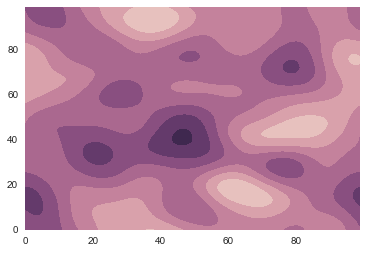

In [68]:
cm = sns.cubehelix_palette(as_cmap=True)
plt.contourf(dat[250], cmap=cm)
len(dat)

In [300]:
frame = 250
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])

from scipy.spatial.distance import pdist, cdist
import numpy.linalg as LA
def torus_dist(x1, x2):
    '''
    This function calculates the minimum euclidean distance, assuming
    periodic boundary conditions with orthorhombic cells; i.e. the
    smallest distance between two points on a torus.
    '''
    dx = x2 - x1
    dx += -1.*np.rint(dx)
    dx = LA.norm(dx)
    return dx

def per_distance(x0, x1, dimensions=np.array([1,1])):
    delta = np.abs(x0 - x1)
    delta = np.where(delta > 0.5 * dimensions, dimensions - delta, delta)
    return np.sqrt((delta ** 2).sum(axis=-1))

# dists = pdist(particles.T, torus_dist)
# dists = cdist(particles.T, particles.T, torus_dist)
# sns.distplot(dists, kde=False)
def per_dist(points):
#     print points.shape
    weights = np.array([[0., 0.],
                        [1., 0.],
                        [0., 1.],
                        [1., 1.],
                        [-1.,-1.],
                        [-1, 0.], 
                        [0.,-1],
                        [1.,-1.],
                        [-1.,1.]])
    
    particles=np.array([weights[0,0]+points[0], weights[0,1]+points[1]])
    dists = pdist(particles.T)
#     print dists.shape
    for n,weight in enumerate(weights, 1):
        particles=np.array([weight[0]+points[0], weight[1]+points[1]])
#         print particles.T.shape
        dists=np.vstack((dists, pdist(particles.T)))
    return np.min(dists, axis=0)
per_dist(particles)

array([ 0.01010101,  0.02020202,  0.03030303, ...,  0.01010101,
        0.02020202,  0.01010101])

In [277]:
%timeit pdist(particles.T)
# np.min()

10 loops, best of 3: 63.7 ms per loop


In [318]:
%timeit per_dist(particles)

1 loop, best of 3: 6.37 s per loop


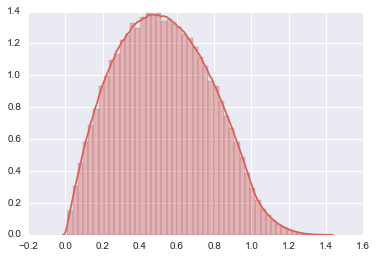

In [322]:
# sns.distplot(per_dist(np.array([xx.flatten(),
#                                yy.flatten()])))
sns.distplot(per_dist(particles))

In [348]:
frame = 500
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])

phase1, edges = np.histogram(per_dist(particles), bins=30)
# all_p, edges = np.histogram(per_dist(np.array([xx.flatten(),
#                                yy.flatten()])), bins=30)
rho = particles[0].size/xx.size
dr = np.diff(edges)
corr = phase1/(rho*4*np.pi*edges[1:]**2*dr)
# phase1/all_p
corr

array([  2.24933867e+08,   1.44285089e+08,   9.07704251e+07,
         6.30022061e+07,   4.52591599e+07,   3.37029622e+07,
         2.68026413e+07,   2.08332314e+07,   1.72921082e+07,
         1.40509153e+07,   1.13112925e+07,   9.10776280e+06,
         7.36004254e+06,   5.91302370e+06,   4.70887815e+06,
         3.75180603e+06,   2.92496519e+06,   2.25837673e+06,
         1.55197718e+06,   1.08707705e+06,   6.53188146e+05,
         3.73916838e+05,   2.43903047e+05,   1.70400422e+05,
         1.20306898e+05,   7.60486025e+04,   4.90551536e+04,
         2.11326088e+04,   6.84520887e+03,   6.22906097e+02])

In [343]:
np.diff(edges)

array([ 0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627,
        0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627,
        0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627,
        0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627,
        0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627,
        0.04656627,  0.04656627,  0.04656627,  0.04656627,  0.04656627])

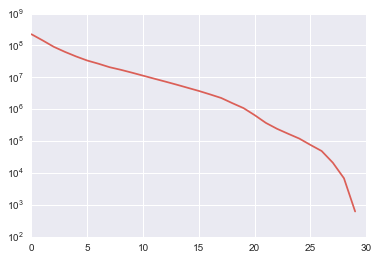

In [352]:
# plt.plot(edges[1:],phase1/all_p)
plt.semilogy(corr)

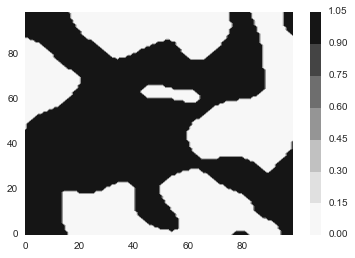

In [72]:
cont = plt.contourf(np.round(dat[frame]))
plt.colorbar(cont)

In [60]:
dists.max()

0.69996428844728964

In [73]:
dists.shape

(5490, 5490)

In [70]:
particles.shape

(2, 5490)

[ 0.          0.01010101  0.02020202 ...,  0.02020202  0.01010101  0.        ]
[ 0.01010101  0.          0.01010101 ...,  0.03030303  0.02020202
  0.01010101]
[ 0.02020202  0.01010101  0.         ...,  0.04040404  0.03030303
  0.02020202]
[ 0.03030303  0.02020202  0.01010101 ...,  0.05050505  0.04040404
  0.03030303]
[ 0.04040404  0.03030303  0.02020202 ...,  0.06060606  0.05050505
  0.04040404]
[ 0.05050505  0.04040404  0.03030303 ...,  0.07070707  0.06060606
  0.05050505]
[ 0.06060606  0.05050505  0.04040404 ...,  0.08080808  0.07070707
  0.06060606]
[ 0.07070707  0.06060606  0.05050505 ...,  0.09090909  0.08080808
  0.07070707]
[ 0.08080808  0.07070707  0.06060606 ...,  0.1010101   0.09090909
  0.08080808]
[ 0.09090909  0.08080808  0.07070707 ...,  0.11111111  0.1010101
  0.09090909]


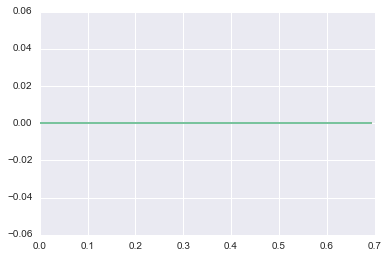

In [81]:
for i in dists[:10]:
    print i
    dist, edges = np.histogram(i, bins=100)
#     print dist.shape, edges.shape
    plt.plot(edges[:-1], dist/i.size, alpha=.5)

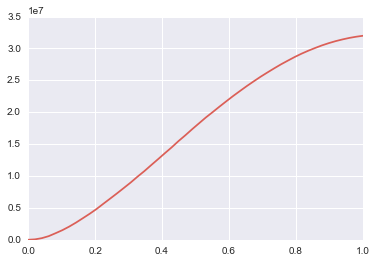

In [448]:
from sklearn.neighbors import KDTree, BallTree, DistanceMetric
tree = KDTree(particles.T)
r = np.linspace(0,1)
plt.plot(r, tree.two_point_correlation(particles.T, r))

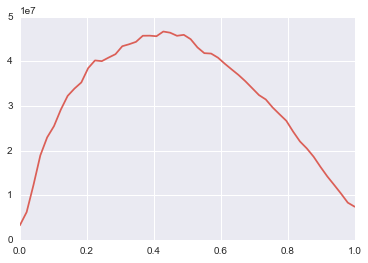

In [455]:
rad_dist = np.gradient(tree.two_point_correlation(particles.T, r), np.gradient(r))
plt.plot(r, rad_dist)

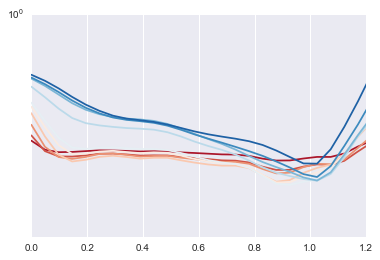

In [484]:
from __future__ import division
frame = 100
all_particles = np.array([xx.flatten(), yy.flatten()])
tree = KDTree(all_particles.T)
    # tree = BallTree(particles.T, metric=new_dist_meas)
count = np.gradient((tree.two_point_correlation(all_particles.T, r)), dr)
count = count.astype(np.float32, copy=False)
colors = sns.color_palette('RdBu', n_colors=10)
def corr_plot(frame, color):
    r = np.linspace(0,np.sqrt(2),30)
    dr = np.gradient(r)

    particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                        yy.flatten()[np.round(dat[frame]).flatten()>.5]])
    # new_dist_meas = DistanceMetric.get_metric(torus_dist)
    # tree = BallTree(particles.T, metric=new_dist_meas)
    tree_p = KDTree(particles.T)

    count_p = np.gradient(tree_p.two_point_correlation(particles.T, r), dr)

    count_p = count_p.astype(np.float32, copy=False)

    plt.semilogy(r, np.divide(count_p,count), color=color)
#     plt.plot(r, count_p)
#     print count_p
    plt.xlim(0,1.2)
    plt.ylim(0,1)
for n,i in enumerate([5,10,20,50,75,100,200,300,400,500]):
    corr_plot(i, colors[n])
# plt.xscale('log')
# plt.yscale('log')
    # plt.plot(np.diff(count))
# np.divide(count_p,count)

In [92]:
particles.T.shape

(5490, 2)

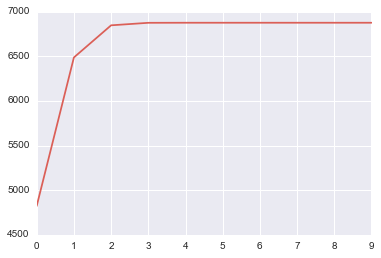

In [102]:
plt.plot(tree.kernel_density(particles.T[:10], h=.01))

In [163]:
from tqdm import tqdm
def radial_hist(particle, tree, r, dr=.1):
    
    below = tree.query_radius(particle, r=r+dr, count_only=True)
    above = tree.query_radius(particle, r=r, count_only=True)
    return below - above

def get_g(samples, tree, r, dr=0.1):
    all_g = np.zeros((samples.shape[0], r.size))
    
    for n,p in tqdm(enumerate(samples)):
        all_g[n] = [radial_hist(p, tree, i, dr=dr) for i in r]
    print all_g.shape
    return all_g.mean(axis=0)
    
frame = 500
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])
new_dist_meas = DistanceMetric.get_metric(torus_dist)
tree = BallTree(particles.T, metric=new_dist_meas)

g = get_g(particles.T[::100], tree, np.linspace(0,1), dr=.1)

(58, 50)


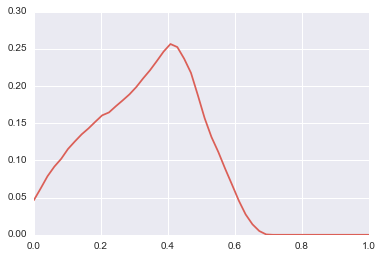

In [164]:
r = np.linspace(0,1)
# plt.plot( np.array([radial_hist(particles.T[0], tree, i, dr=.1) for i in r]))
plt.plot(r, g/particles.T.shape[0])

In [138]:
.shape

(58,)

In [175]:
from sklearn.utils import check_random_state
try:
    from sklearn.neighbors import KDTree
    sklearn_has_two_point = True
except ImportError:
    import warnings
    sklearn_has_two_point = False
    
def two_point(data, bins, method='standard',
              data_R=None, random_state=None):
    """Two-point correlation function

    Parameters
    ----------
    data : array_like
        input data, shape = [n_samples, n_features]
    bins : array_like
        bins within which to compute the 2-point correlation.
        shape = Nbins + 1
    method : string
        "standard" or "landy-szalay".
    data_R : array_like (optional)
        if specified, use this as the random comparison sample
    random_state : integer, np.random.RandomState, or None
        specify the random state to use for generating background

    Returns
    -------
    corr : ndarray
        the estimate of the correlation function within each bin
        shape = Nbins
    """
    data = np.asarray(data)
    bins = np.asarray(bins)
    rng = check_random_state(random_state)

    if method not in ['standard', 'landy-szalay']:
        raise ValueError("method must be 'standard' or 'landy-szalay'")

    if bins.ndim != 1:
        raise ValueError("bins must be a 1D array")

    if data.ndim == 1:
        data = data[:, np.newaxis]
    elif data.ndim != 2:
        raise ValueError("data should be 1D or 2D")

    n_samples, n_features = data.shape
    Nbins = len(bins) - 1

    # shuffle all but one axis to get background distribution
    if data_R is None:
        data_R = data.copy()
        for i in range(n_features - 1):
            rng.shuffle(data_R[:, i])
    else:
        data_R = np.asarray(data_R)
        if (data_R.ndim != 2) or (data_R.shape[-1] != n_features):
            raise ValueError('data_R must have same n_features as data')

    factor = len(data_R) * 1. / len(data)

    if sklearn_has_two_point:
        # Fast two-point correlation functions added in scikit-learn v. 0.14
        KDT_D = KDTree(data)
        KDT_R = KDTree(data_R)

        counts_DD = KDT_D.two_point_correlation(data, bins)
        counts_RR = KDT_R.two_point_correlation(data_R, bins)

    else:
        warnings.warn("Version 0.3 of astroML will require scikit-learn "
                      "version 0.14 or higher for correlation function "
                      "calculations. Upgrade to sklearn 0.14+ now for much "
                      "faster correlation function calculations.")

        BT_D = BallTree(data)
        BT_R = BallTree(data_R)

        counts_DD = np.zeros(Nbins + 1)
        counts_RR = np.zeros(Nbins + 1)

        for i in range(Nbins + 1):
            counts_DD[i] = np.sum(BT_D.query_radius(data, bins[i],
                                                    count_only=True))
            counts_RR[i] = np.sum(BT_R.query_radius(data_R, bins[i],
                                                    count_only=True))

    DD = np.diff(counts_DD)
    RR = np.diff(counts_RR)

    # check for zero in the denominator
    RR_zero = (RR == 0)
    RR[RR_zero] = 1

    if method == 'standard':
        corr = factor ** 2 * DD / RR - 1
    elif method == 'landy-szalay':
        if sklearn_has_two_point:
            counts_DR = KDT_R.two_point_correlation(data, bins)
        else:
            counts_DR = np.zeros(Nbins + 1)
            for i in range(Nbins + 1):
                counts_DR[i] = np.sum(BT_R.query_radius(data, bins[i],
                                                        count_only=True))
        DR = np.diff(counts_DR)

        corr = (factor ** 2 * DD - 2 * factor * DR + RR) / RR

    corr[RR_zero] = np.nan

    return corr



[ 0.15597645  0.00534051  0.          0.0068838   0.00801935  0.
  0.00632595  0.0050198   0.01123152  0.01424141  0.          0.00567011
  0.00587597  0.          0.00758431  0.00796719  0.00981187  0.0097234 ]


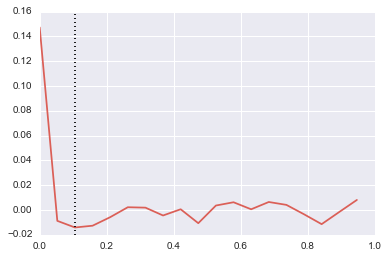

In [380]:
# from .utils import check_random_state
frame = 10
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])

r = np.linspace(0,1,20)
corr = two_point(particles.T, r, method='landy-szalay')
plt.plot(r[:-1], corr)

dcor = np.abs(np.diff(corr))
dcor[dcor<0.005] = 0.
print dcor
# plt.plot(r[:-2], dcor)
# plt.axvline(r[:-1][corr[:15].argmin()], color='k', ls=':')
plt.axvline(r[:-2][dcor.argmin()], color='k', ls=':')

In [384]:
r = np.linspace(0,1,20)
all_corr = np.zeros((500,19))
len_scale = []
for frame in tqdm(range(500)):
    particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])

    
    corr = two_point(particles.T, r, method='landy-szalay')
#     plt.plot(r[:-1], corr)
    all_corr[frame] = corr
    dcor = np.abs(np.diff(corr))
    dcor[dcor<0.005] = 0.
    len_scale+=[r[:-2][dcor.argmin()]]

#     print dcor
    # plt.plot(r[:-2], dcor)
    # plt.axvline(r[:-1][corr[:15].argmin()], color='k', ls=':')
#     plt.axvline(, color='k', ls=':')

(array([  4,   6,   8,  11,  16,  32,  35,  37,  47,  49,  51,  54,  68,
        70,  72,  74,  85,  90,  96, 100, 102, 114, 119, 121, 129, 140,
       142, 144, 146, 148, 152, 156, 165, 168, 188, 190, 198, 200, 202,
       205, 211, 214, 216, 219, 221, 225, 228, 234, 236, 240, 244, 248,
       251, 254, 273, 352, 354, 359, 361, 365, 382, 385, 387, 390, 398,
       402, 411, 413, 435]),)


(0, 0.8)

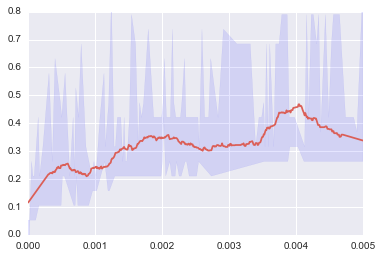

In [433]:
# print len_scale
# 
# sns.regplot(x=np.linspace(0,.005,500),y=np.array(len_scale), robust=True)
# plt.scatter(np.linspace(0,0.005,500),len_scale)
tim = np.linspace(0,.005,500)
# sns.tsplot(data=len_scale, time=tim, alpha = .4)
from scipy.signal import savgol_filter, argrelmax, argrelmin
from scipy.interpolate import interp1d

smooth = savgol_filter(len_scale, 61,1)

mins = argrelmin(np.array(len_scale))
mins_f = interp1d(tim[mins[0]], np.array(len_scale)[mins[0]], fill_value='extrapolate')

maxs = argrelmax(np.array(len_scale))
maxs_f = interp1d(tim[maxs[0]], np.array(len_scale)[maxs[0]], fill_value='extrapolate')
print mins
plt.plot(tim, smooth)
# plt.plot()
# plt.plot()
plt.fill_between(tim, mins_f(tim), maxs_f(tim), alpha=.1, color='b')
plt.ylim(0,.8)
# sns.regplot(y=np(range(500)),x=len_scale)

In [416]:
import json
import pickle as pkl
with open('results.txt', 'wb') as f:
    pkl.dump({'times':np.linspace(0,.005,500),
               'phi(t)': dat, 
               '2pt_corr': all_corr, 
               'len_scale': len_scale},f)


[MoviePy] Building file two-pt-corr.gif with imageio


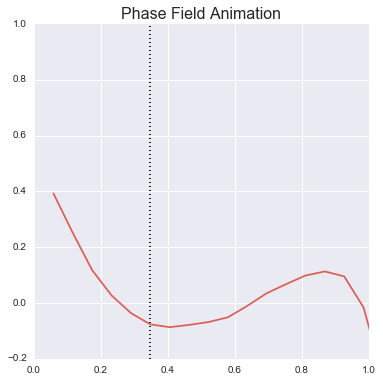

In [381]:
fig, ax = plt.subplots(1, figsize=(6, 6))


def plot_until_t(time):
    ax.clear()
    ax.set_ylim(-0.2,1)
    ax.set_xlim(0,1)
#     ax.axis('off')
    ax.set_title("Phase Field Animation", fontsize=16)
#     print np.argmin(np.abs(np.array(times)-.0005*(time))
    pos = np.argmin(np.abs(np.array(times)-.0005*(time)))
    particles=np.array([xx.flatten()[np.round(dat[pos]).flatten()>.5],
                    yy.flatten()[np.round(dat[pos]).flatten()>.5]])
    
    
    r = np.linspace(0,1.1,20)
    corr = two_point(particles.T, r, method='landy-szalay')
    ax.plot(r[1:], corr)
    dcor = np.abs(np.diff(corr))
    dcor[dcor<0.005] = 0.
    ax.axvline(r[:-2][dcor.argmin()], color='k', ls=':')
#     ax.axvline(r[1:][corr[:15].argmin()], color='k', ls=':')
#     ax.contourf(np.round(mat))
    return mplfig_to_npimage(fig)

animation = VideoClip(plot_until_t, duration = 20)
animation.write_gif("two-pt-corr.gif", fps=15)

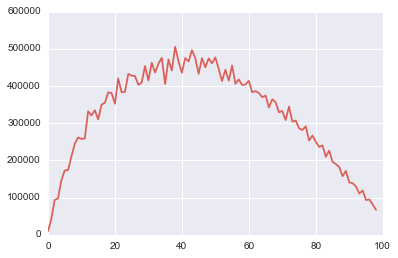

In [191]:
frame = 500
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])
new_dist_meas = DistanceMetric.get_metric(torus_dist)
# tree = BallTree(particles.T, metric=new_dist_meas)
tree = KDTree(particles.T)
count = tree.two_point_correlation(particles.T, r)

plt.plot(np.diff(count))


In [258]:

rand_nums = np.random.rand(10000,2)


In [259]:
%timeit torus_dist(rand_nums, rand_nums)

The slowest run took 101.20 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 144 µs per loop


In [260]:
%timeit per_distance(rand_nums, rand_nums)

1000 loops, best of 3: 269 µs per loop


array([ 0.54227304,  0.50027364,  0.45599321,  0.4175556 ,  0.38908979,
        0.36802647,  0.35299221,  0.34653178,  0.34176314,  0.33484045,
        0.32424197,  0.3123872 ,  0.30257982,  0.29488295,  0.28900638,
        0.28272235,  0.27436945,  0.26159075,  0.24500082,  0.22879256,
        0.214828  ,  0.23603038,  0.29176116,  0.37360436,  0.48901016,
        0.66697472,  0.87021029,  0.9902482 ,  1.        ], dtype=float32)

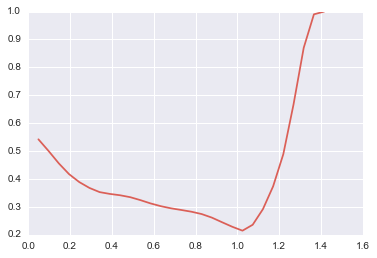

In [329]:
from __future__ import division
frame = 500
r = np.linspace(0,np.sqrt(2),30)
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])
new_dist_meas = DistanceMetric.get_metric(torus_dist)
# tree = BallTree(particles.T, metric=new_dist_meas)
tree = KDTree(particles.T)

count_p = np.diff(tree.two_point_correlation(particles.T, r))

particles = np.array([xx.flatten(), yy.flatten()])
tree = KDTree(particles.T)
# tree = BallTree(particles.T, metric=new_dist_meas)
count = np.diff((tree.two_point_correlation(particles.T, r)))

count = count.astype(np.float32, copy=False)
count_p = count_p.astype(np.float32, copy=False)

plt.plot(r[1:], np.divide(count_p,count))
# plt.plot(np.diff(count))
np.divide(count_p,count)

(29,) (29,)


(-0.5, 1)

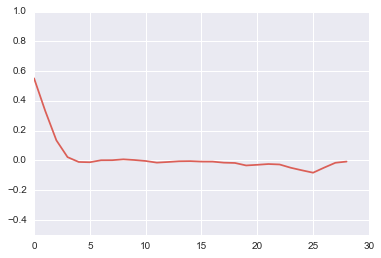

In [209]:
frame = 100
particles=np.array([xx.flatten()[np.round(dat[frame]).flatten()>.5],
                    yy.flatten()[np.round(dat[frame]).flatten()>.5]])
new_dist_meas = DistanceMetric.get_metric(torus_dist)
# tree = BallTree(particles.T, metric=new_dist_meas)
tree = KDTree(particles.T)
count = tree.two_point_correlation(particles.T, r)


dat_r = particles.T.copy()

check_random_state(None).shuffle(dat_r[:,0])
tree_r = KDTree(dat_r)
count_r = tree_r.two_point_correlation(dat_r, r)
RR = np.diff(count_r)
RR[RR==0]=1
print np.diff(count).shape, RR.shape

factor = len(dat_r)*1./len(particles.T)
corr = factor**2*np.diff(count)/RR - 1
# corr[RR==0]=np.nan
plt.plot(corr)
plt.ylim(-.5,1)

In [225]:
import moviepy.editor as mpy
reload(mpy)
clip_2ptcorr = mpy.VideoFileClip("two-pt-corr.gif")
clip_sim = mpy.VideoFileClip("phase_field.gif")
animation = mpy.clips_array([[clip_sim, clip_2ptcorr]])
animation.write_gif("sync_plot.gif", fps=15)


[MoviePy] Building file sync_plot.gif with imageio


In [446]:
import string
import random
''.join([random.choice(string.hexdigits) for n in xrange(5)])

'ff40c'

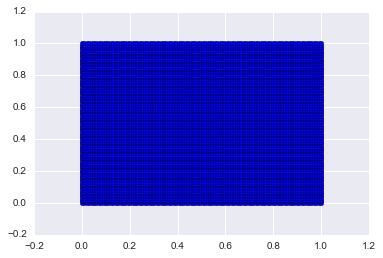

In [473]:
plt.scatter(xx.flatten(),yy.flatten())

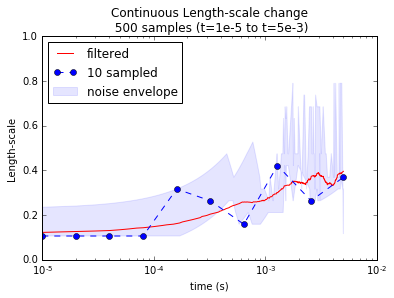

In [36]:
import numpy as np

x = np.linspace(0,1, 100)
y = x
xx, yy = np.meshgrid(x,y)
try:
    import pickle as pkl
    with open('results.txt', 'rb') as f:
        res = pkl.load(f)
        times = res['times']
        dat = res['phi(t)']
        all_corr = res['2pt_corr']
        len_scale = res['len_scale']
        
except IOError:
    print 'did not find results.txt in working directory'
    raise

r = np.linspace(0,1,20)  # bins



from scipy.signal import savgol_filter, argrelmax, argrelmin
from scipy.interpolate import interp1d

smooth = savgol_filter(len_scale, 101,1, mode='nearest')
tim = np.linspace(0,.005,500)
mins = argrelmin(np.array(len_scale))
mins_f = interp1d(tim[mins[0]], np.array(len_scale)[mins[0]], fill_value='extrapolate')

maxs = argrelmax(np.array(len_scale))
maxs_f = interp1d(tim[maxs[0]], np.array(len_scale)[maxs[0]], fill_value='extrapolate')

steps = [1,2,4,8,16,32,64,128,256,499]
dtim = [tim[i] for i in steps]
discr = [len_scale[i] for i in steps]

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
plt.figure(figsize=(6,4))

xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,3))

plt.plot(tim, smooth, 'r', label='filtered')
plt.plot(dtim, discr, 'o--', label='10 sampled')

plt.fill_between(tim, mins_f(tim), maxs_f(tim), 
                 alpha=.1, color='b', label='noise envelope')
plt.ylim(0,1)
plt.ylabel('Length-scale')
plt.xlabel('time (s)')
plt.gca().xaxis.set_major_formatter(xfmt)
plt.title("Continuous Length-scale change\n 500 samples (t=1e-5 to t=5e-3)")
plt.legend(loc=2)
plt.xscale('log')
plt.show()